# Overview

This notebook enables the reproduction of all the analyses reported in the manuscript "Long-term patterns of gender imbalance in an industry without ability or level of interest differences."

Besides the code included directly in the notebook, there are a few libraries, included in the distribution, that are called by this code.

## Load relevant packages

In [10]:
import sys
from string import ascii_lowercase

import collections
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from os import path, getcwd
from copy import deepcopy
from matplotlib import gridspec
from matplotlib.font_manager import FontProperties
from numpy import array, arange, nan

from my_stats import ( place_commas, half_frame, bottom_frame, star, 
                       significant_digits, e_value, risk_ratio,
                       rolling_mean_sem, save_fig )

from dataframe_operations import ( load_dataset, get_movies_df, 
                                   get_genre_movies_df, prepare_dataframe,
                                   get_movie_budgets_df
                                 )

from movie_operations import ( plot_timeline, plot_total_year_movies, 
                               plot_industry_concentration, plot_gender_percent, 
                               roll_mean_sem_movies, plot_risk_ratios,
                             )


## Initialize global variables

In [3]:
CREDITS = ['acting_all', 'acting_credited', 'casting', 'cinematography', 
           'directing', 'producing', 'writing']

# Exclude 'Animation', 'Reality-TV', 'Game-Show', 'Talk-Show', 'Adult' from data
#
GENRES = ['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Drama', 'Documentary', 
          'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music', 'Musical', 
          'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'Short']

PALETTE = [ 'goldenrod',  #number movies, inductry concentration
            '#7570b3',  #actors, all -- purple
            '#006d2c',  #writers -- green
            'steelblue', #directors --
            '#d95f02',  #producers -- orange
            '#a6761d',  #casting -- gold
            '#e7298a',  #cinematography -- pink
            '#e6ab02',  #movies, romance -- yellow
            '#1b9e77',  #movies, action  -- chartreuse
            ]
ROLES = ['cast_all', 'cast_credited', 'casting_directors', 'cinematographers', 
         'directors', 'producers', 'screenwriters']

CONCENTRATION = { 'entropy': ['Entropy', 'entropy'],
                  'gini': ['Gini coefficient', 'gini_coefficient'],
                  'herf': ['Herfindahl-Hirschman\nindex', 'herfindahl_hirschman_index'],
                  }


# Data Analyses


## Historical trends of gender imbalance in the U.S. movie industry. 

**(a)** Timeline of 20th century events relevant to the evolution of the U.S. movie industry. Red bars identify major wars with U.S. involvement (chronologically, World War I, World War II, Korean war, and Vietnam war). Light peach bars show the peak of the feminism waves in the U.S. Orange shadings indicate the rates of TV adoption in U.S. households (from unsaturated to saturated: < 30%, < 60%, < 90%) [41]. Light blue shadings identify, from less to more saturated, MPPC control [42], consolidation of the Hollywood Studio System, and Studio System’s heyday [20]. The de Havilland vs. Warner Bros’ 1944 decision freed major stars from life long contracts with as single studio. The U.S. vs. Paramount’s 1948 decision unravelled the vertical integration of the U.S. movie industry. These legal defeats enabled greater negotiating power for movie stars and the ability of independent producing companies to have their movies distributed in a more equitable manner. 

**(b)** Number of U.S.-produced movies considered in our study released annually. See Fig. S1 for breakdown by movie genre. 

**(c)** Concentration of the industry’s output by producing company/studio as measured by the Herfindhal-Hirschman index. Larger values indicate that a large fraction of movies are produced by a small number of studios. We observe an increase of the degree of concentration during the period of control of the industry by MPPC. The degree of concentration reaches a minimum in 1922 but then it grows until 1944. These trends are consistent with current understanding of the consolidation and golden age of the Hollywood Studio System [20,42]. 

**(d)** Temporal dependence of the percentage of females according to movie-making function. The olive solid line in the top panel shows female participation in the U.S workforce in order to provide a comparison to the overall economy. Solid lines indicate average values and the color bands show 95% confidence intervals. The red dotted lines show the highest value of female representation attained prior to 1940, and the red dashed lines show the lowest value attained after 1930, if different from zero. For all movie-making functions there is a similar “U-shape” pattern with an early maximum achieved prior to 1922, a minimum reached by the mid-1940s, and an increase after.


Done with panel  a 


Loaded IMDb movies acting_all_gender_percentage
Got all_movies
Number of movies in IMDb database is 25615
Done with panel  b 

INDUSTRY CONCENTRATION
1206 211 [('Bluebird Photoplays', 116), ('Universal Film Mfg', 89), ('Vitagraph', 50), ('New York Motion Picture', 49), ('Metro Pictures', 49), ('American Film', 48), ('Fox Film', 38), ('World Film', 32), ('Thanhouser Film', 32), ('Famous Players Film', 31)]



792 250 [('Famous Players Lasky', 66), (' ', 53), ('Universal Pictures', 51), ('Universal Film Mfg', 44), ('Fox Film', 27), ('Goldwyn Pictures', 19), ('Realart Pictures', 19), ('Selznick Pictures', 18), ('Preferred Pictures', 18), ('Metro Pictures', 17)]



1216 120 [('Universal Pictures', 125), ('Republic Pictures', 120), ('20th Century Fox Film', 119), ('Columbia Pictures', 116), ('Warner Bros Pictures', 114), ('Metro Goldwyn Mayer', 110), ('Paramount Pictures', 97), ('RKO Radio Pictures', 88), ('Monogram Pictures', 34), ('Producers Releasing', 24)]



Done 

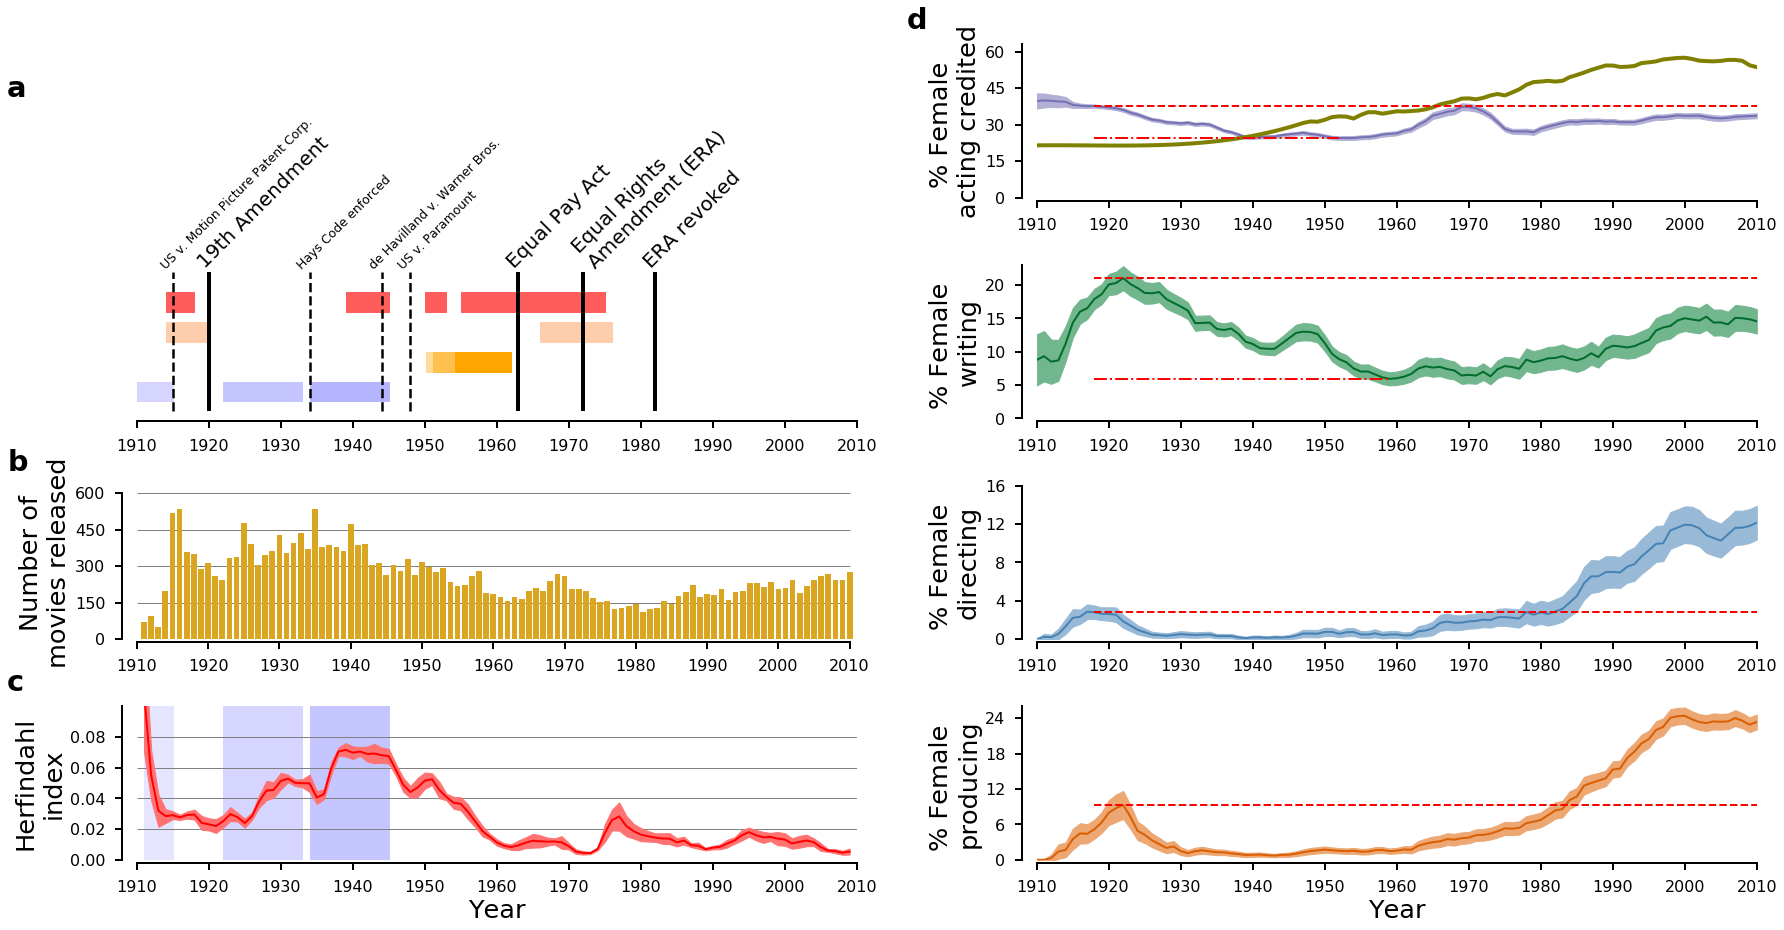

In [26]:
y_min = 1911
y_max = 2010
k = 0

# Create figure for left hand side panels
#
#       w_fig and w_space define ratio of widths of panels to space between panels
#
w_fig = 5.0
w_space = 0.9
my_font_size = 16

figure = plt.figure(figsize=(25.0, 15.))
gs1 = gridspec.GridSpec(7, 1, height_ratios=[w_fig, w_space, w_fig, 
                                             w_space, w_fig, w_space, w_fig])
gs1.update(left=0.05, right=0.45)

# Create timeline for movie industry
#
timeline = figure.add_subplot(gs1[2])
plot_timeline(timeline, y_min, y_max, my_font_size)
timeline.text(-0.18, 2.10, ascii_lowercase[k], weight="bold", transform=timeline.transAxes,
              size=1.8 * my_font_size)
print('Done with panel ',  ascii_lowercase[k], '\n')

# Load data
#
role = 'acting_all'
role_key = role + "_gender_percentage"
all_movies = get_movies_df(role_key)
print('Got all_movies')

# Create plot of number of movies released per year
#
k += 1
movies_released = figure.add_subplot(gs1[4])
ax_labels = ['', 'Number of\nmovies released']
plot_total_year_movies(movies_released, all_movies, y_min, y_max, 600, 
                       my_font_size, False, ax_labels, PALETTE)
movies_released.text(-0.18, 1.1, ascii_lowercase[k], weight="bold", 
                     transform=movies_released.transAxes,
                     size=1.8 * my_font_size)
print('Done with panel ',  ascii_lowercase[k], '\n')

# Create plot of evolution of industry concentration
#
k += 1
production_concentration = figure.add_subplot(gs1[6])
temp = plot_industry_concentration('herfindahl', production_concentration, all_movies, 
                                   y_min, y_max, my_font_size)
production_concentration.text(-0.18, 1.1, ascii_lowercase[k], weight="bold",
                              transform=production_concentration.transAxes, 
                              size=1.8 * my_font_size)
print('Done with panel ',  ascii_lowercase[k], '\n')

# Create figure for right hand side panels
#
gs2 = gridspec.GridSpec(7, 1, height_ratios=[ w_fig, w_space, w_fig, w_space, 
                                              w_fig, w_space, w_fig ])
gs2.update(left=0.55, right=0.95)

roles = ['acting_credited', 'writing', 'directing', 'producing']
representation = {}
genre = 'All'
color_ids = [1, 2, 3, 4]
sub = []
for i in range(4):
    sub.append(figure.add_subplot(gs2[2*i]))
    representation[roles[i]] = plot_gender_percent(sub[-1], roles[i], y_min, 
                                                   y_max, my_font_size,
                                                   genre, color_ids[i], PALETTE)
    if i == 0:
        sub[-1].text(-0.18, 1.1, ascii_lowercase[3], weight="bold",
                     transform=sub[-1].transAxes, size=1.8 * my_font_size)
    print('\n')

print('Done with panel ', ascii_lowercase[3], '\n')

save_fig(figure, 'figure_1', 'eps')


## Historical trends of gender imbalance in the casts of U.S.-produced movies. 

Temporal dependence of the percentage of females actors according to movie genre. Solid lines indicate average values and the color bands show 95% confidence intervals. The red dotted lines highlight the highest value of female representation attained prior to 1940, whereas the red dashed lines highlight the lowest value attained after 1930. For all genres with sufficient number of movies, we find a clear “U-shape” pattern.



ACTING_ALL -- Action
Early max of mean female percentage of 30.2 was achieved in 1918
Early maximum reached again in 1940
Mean female percentage was lowest in 1944 at a level of 13.0
Mean female percentage in 1966 was 21.6
Top female rate was: 32.04
Done with panel for Action

ACTING_ALL -- Adventure
Early max of mean female percentage of 30.5 was achieved in 1919
Early maximum reached again in 1940
Mean female percentage was lowest in 1939 at a level of 14.7
Mean female percentage in 1966 was 21.1
Top female rate was: 46.43
Done with panel for Adventure

ACTING_ALL -- Biography
Early max of mean female percentage of 53.1 was achieved in 1928
Early maximum reached again in 1940
Mean female percentage was lowest in 1945 at a level of 17.1
Mean female percentage in 1966 was 28.7
Top female rate was: 60.71
Done with panel for Biography

ACTING_ALL -- Comedy
Early max of mean female percentage of 37.5 was achieved in 1921
Early maximum reached again in 2007
Mean female percentage was lowe

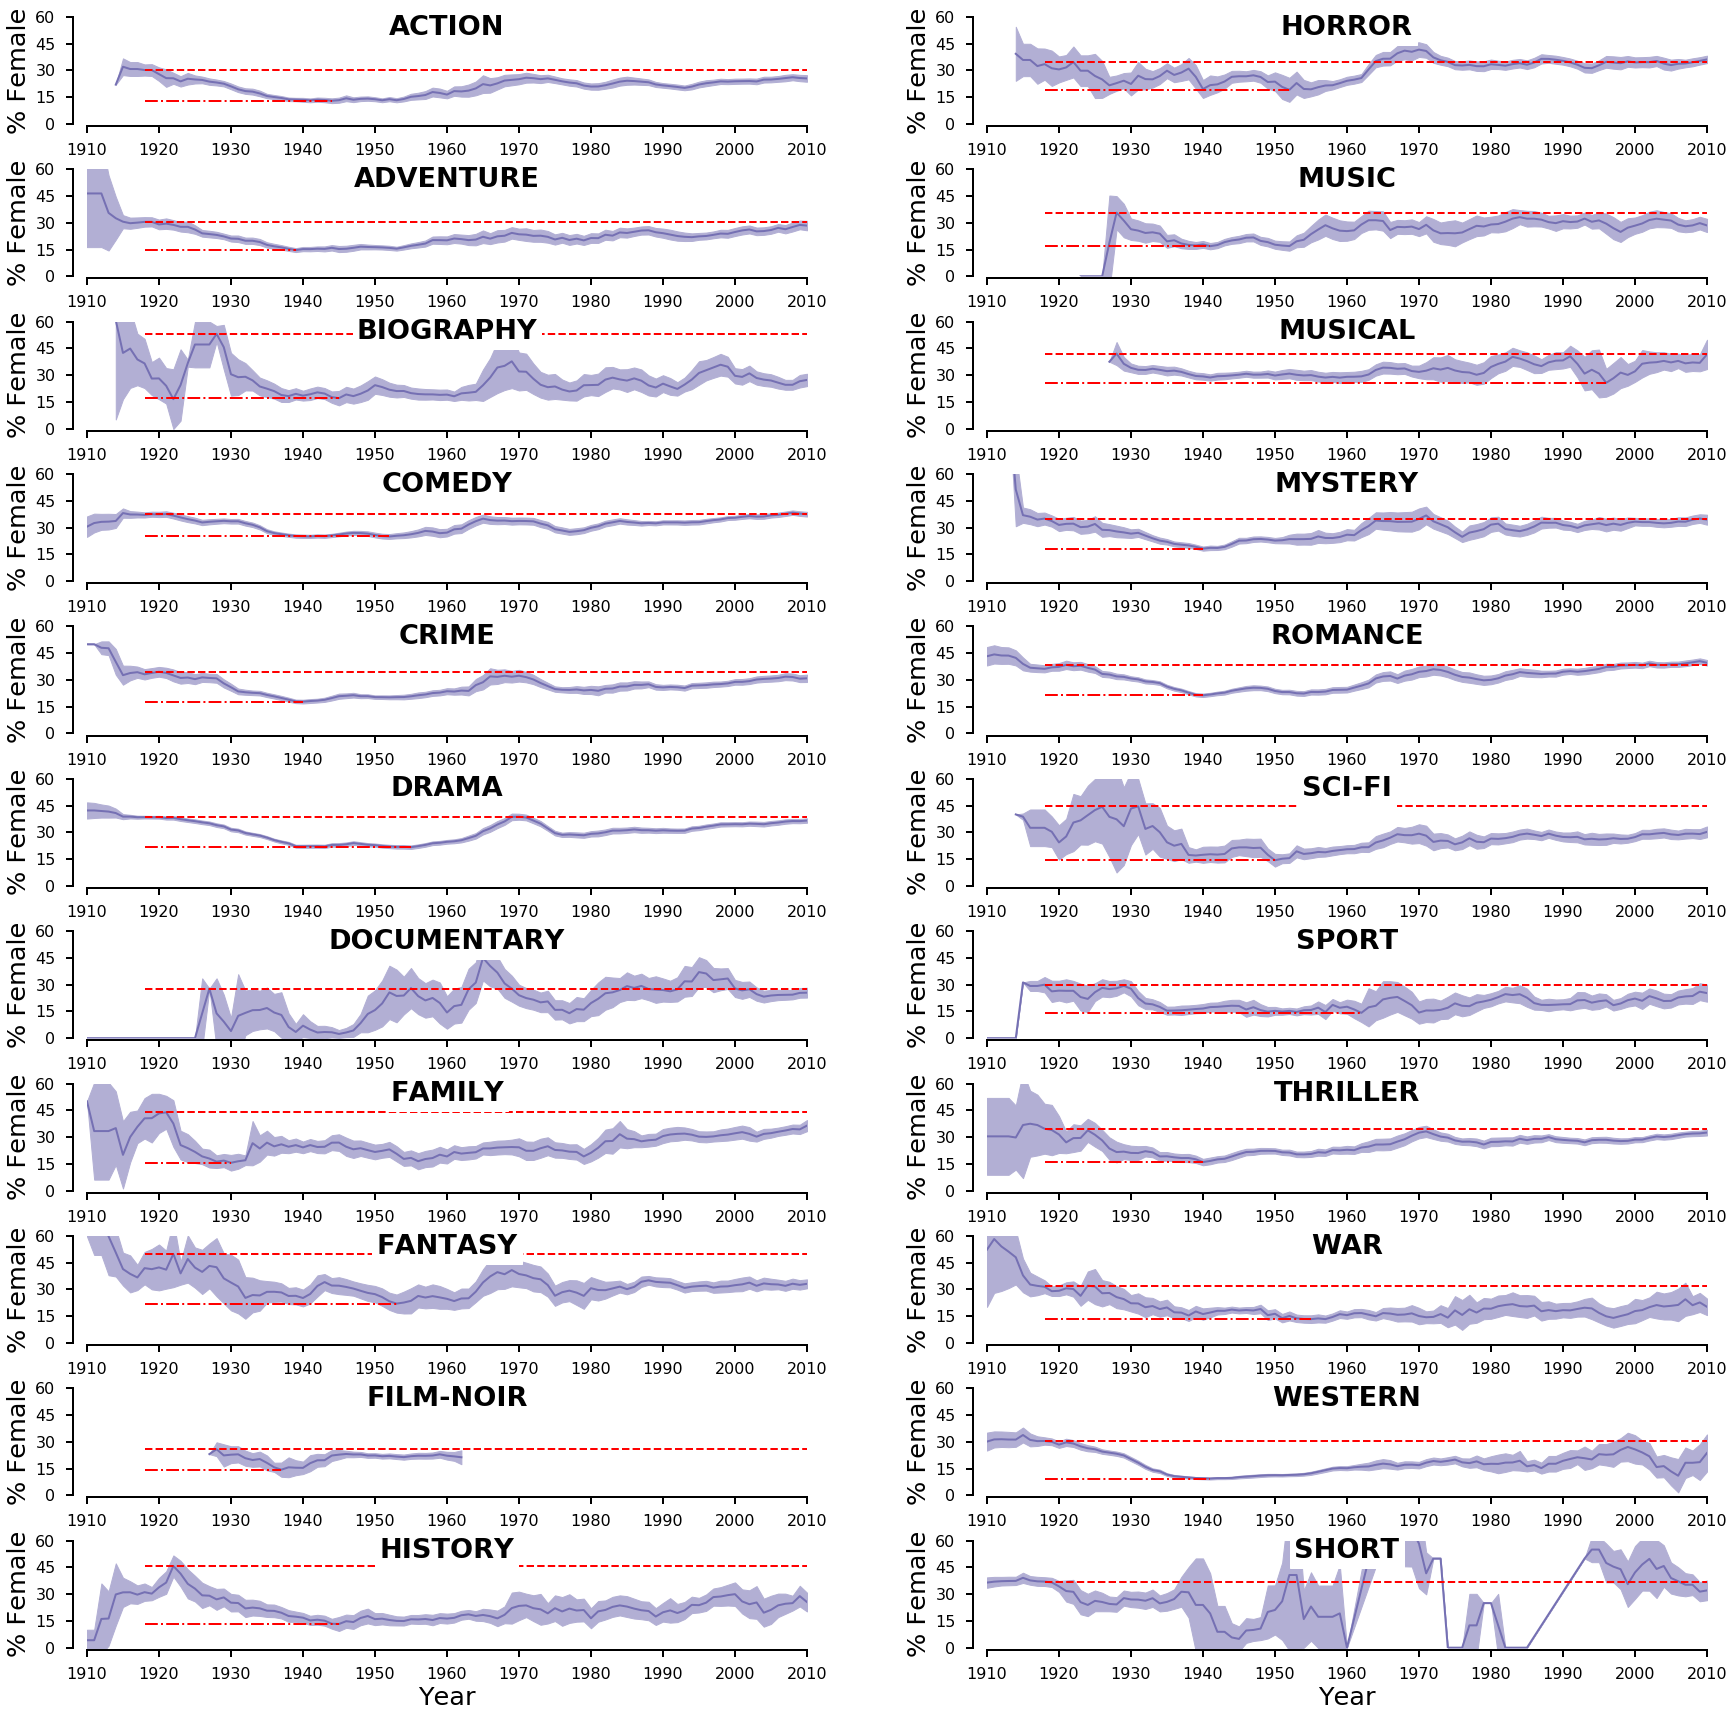

In [27]:
y_min = 1910
y_max = 2010

N_genres = len(GENRES)
role = 'acting_all'

# w_fig and w_space define ratio of widths of panels to space between panels
#
w_fig = 5.0
w_space = 0.9
my_font_size = 16

figure = plt.figure(figsize=(25.0, 30.))
gs1 = gridspec.GridSpec(21, 1, height_ratios=[w_fig, w_space, w_fig, w_space, w_fig, 
                                              w_space, w_fig, w_space, w_fig, w_space, 
                                              w_fig, w_space, w_fig, w_space, w_fig, 
                                              w_space, w_fig, w_space, w_fig, w_space, 
                                              w_fig])
gs1.update(left=0.05, right=0.45)

gs2 = gridspec.GridSpec(21, 1, height_ratios=[w_fig, w_space, w_fig, w_space, w_fig, 
                                              w_space, w_fig, w_space, w_fig, w_space, 
                                              w_fig, w_space, w_fig, w_space, w_fig, 
                                              w_space, w_fig, w_space, w_fig, w_space, 
                                              w_fig])
gs2.update(left=0.55, right=0.95)

axes = []
for i in range(int(N_genres / 2)):
    axes.append(figure.add_subplot(gs1[2*i]))
    plot_gender_percent(axes[-1], role, y_min, y_max, my_font_size, 
                        GENRES[i], 1, PALETTE)
    if i == N_genres / 2 - 1:
        axes[-1].set_xlabel('Year')
    print('Done with panel for', GENRES[i])

for i in range(int(N_genres / 2), N_genres):
    axes.append(figure.add_subplot(gs2[2*(i - int(N_genres / 2))]))
    plot_gender_percent(axes[-1], role, y_min, y_max, my_font_size, 
                        GENRES[i], 1, PALETTE)
    if i == N_genres - 1:
        axes[-1].set_xlabel('Year')
    print('Done with panel for', GENRES[i])

save_fig(figure, 'figure_2', 'eps')


## Multivariate logistic (for director, cinematographer, and producers) and OLS (for actors and writers) regressions models of female representation reveal associations with percentage female producers and genre. 

We do not include time dummies in the models for which we show regression results here (see Figs.S2–S5 for other time periods and for models including time dummies). We plot the base 10 logarithm of the risk ratio for each factor. The risk factor for female workforce participation was calculated for an increase of 10%. The risk factor for change in real GPD per capita was calculated for an increase of 1%. The risk factor for number of movies was calculated for an increase of 300. The risk factor for industry concentration was calculate for a change of 0.03. The risk factor for budget was calculated for an increase by 100 fold. The risk ratio for percentage female producers was calculated for an increase of 50%. This value is one of the four typical values observed, the other three being 0%, 25% and 100%. The risk factor for percentage female directors was calculated for an increase of 100% since typically there is a single director. Risk ratios for which we are not able to reject the null hypothesis at the 0.01 level are shown in grey. Risk ratios significantly larger than 1 are shown in yellow and those significantly smaller than 1 are shown in purple.


**For generating figures shown in manuscript, uncomment either** *Option 1* **or** *Option 2* 


In [6]:
def e_value_delta(item):
    """
    Returns relevant_x for E-value calculation.

    Relevant value for directing is 100% because there is typical a single director.
    Relevant value for producing is 50% because typical values are 0%, 25%, 50% and 100%.
    Relevant value for budget is 5. which correspondes to $5M USD.
    Relevant value for number of movies is 100.
    Relevant value for industry concentration is 0.03 because that is difference between Studio System and present.
    """
    if item == '% Female Directors':
        relevant_x = 100.
    elif item == '% Female Producers':
        relevant_x = 50.
    elif item == 'Female Workforce\nParticipation':
        relevant_x = 10.
    elif item == 'Log$_{10}$ Budget':
        relevant_x = 2.
    elif item == 'Herfindahl-Hirschman\nindex':
        relevant_x = 30.
    elif item == 'No. Movies':
        relevant_x = 300.
    else:
        relevant_x = 1.

    return relevant_x


def create_time_dummies(PERIOD):
    """
    Creates list of string with time dummies
    """
    TIME_DUMMIES = []
    for y in range(1911, 2010+1, PERIOD):
        dummy = f"Dummy{y}"
        if PERIOD > 1:
            dummy += f"_{y+PERIOD-1}"
        TIME_DUMMIES.append(dummy)
    
    print( f"\n-----------------------------------------------------------\n"
           f"Time Dummy variables:\n\t{TIME_DUMMIES}" )
    return TIME_DUMMIES


def create_base_input(concentration_key, concentration_flag, budget_flag, included_genres):
    """
    Creates list with standard variables for regression model.
    
    :param concentration_key: string
    :param concentration_flag: Boolean
    :param budget_flag: Boolean
    :param included_genres: list of string
    
    :return : list 
    """
    generic_output = [ 'No. observations', '$R^2$' ]
    base_input = [ 'Intercept', 'Female Workforce\nParticipation', 
                   'Real GDP per capita\nchange']
    base_input += [ 'No. Movies' ]
    if concentration_flag:
        base_input += [ CONCENTRATION[concentration_key][0] ]
    if budget_flag:
        base_input += [ 'Log$_{10}$ Budget' ]
    base_input += included_genres

    return base_input + [ '% Female Producers', '% Female Directors' ]


def create_basic_formula(concentration_flag, budget_flag):
    """
    Creates string with standard variables for regression model.
    
    :param concentration_flag: Boolean
    :param budget_flag: Boolean
    
    :return : string 
    """
    base_formula = ' female_workforce_participation + gdp_growth'
    base_formula +=  ' + number_movies'
    if concentration_flag:
        base_formula += ' + concentration'
    if budget_flag:
        base_formula += ' + log10_budget'

    return base_formula




In [29]:
# Option 1
#
budget_flag = False
concentration_flag = True
concentration_key = 'herf'
PERIOD = 1

# Option 2
#
# budget_flag = True
# concentration_flag = True
# concentration_key = 'herf'
# PERIOD = 1

TIME_DUMMIES = create_time_dummies(PERIOD)
    
# Set up inputs related to genre
#
included_genres = sorted( ['Action', 'Adventure', 'Comedy', 'Crime', 
                           'Romance', 'Drama', 'Thriller', 'Western'] )
formula_genre = ''
for g in included_genres:
    formula_genre += ' + ' + g.replace('-', '')

# Put together list of variables for studied models
#
base_input = create_base_input(concentration_key, concentration_flag, budget_flag, included_genres)
N_inputs = len(base_input)

print( f"\n-----------------------------------------------------------\n"
       f"The model considers {N_inputs} other variables:\n\t{base_input}" )


# Put together formula for studied models
#
base_formula = create_basic_formula(concentration_flag, budget_flag)
print( f"\n-----------------------------------------------------------\n"
       f"The initial formula (prior to adding genre and time dummies) is:"
       f"\n\t{base_formula}" )



-----------------------------------------------------------
Time Dummy variables:
	['Dummy1911', 'Dummy1912', 'Dummy1913', 'Dummy1914', 'Dummy1915', 'Dummy1916', 'Dummy1917', 'Dummy1918', 'Dummy1919', 'Dummy1920', 'Dummy1921', 'Dummy1922', 'Dummy1923', 'Dummy1924', 'Dummy1925', 'Dummy1926', 'Dummy1927', 'Dummy1928', 'Dummy1929', 'Dummy1930', 'Dummy1931', 'Dummy1932', 'Dummy1933', 'Dummy1934', 'Dummy1935', 'Dummy1936', 'Dummy1937', 'Dummy1938', 'Dummy1939', 'Dummy1940', 'Dummy1941', 'Dummy1942', 'Dummy1943', 'Dummy1944', 'Dummy1945', 'Dummy1946', 'Dummy1947', 'Dummy1948', 'Dummy1949', 'Dummy1950', 'Dummy1951', 'Dummy1952', 'Dummy1953', 'Dummy1954', 'Dummy1955', 'Dummy1956', 'Dummy1957', 'Dummy1958', 'Dummy1959', 'Dummy1960', 'Dummy1961', 'Dummy1962', 'Dummy1963', 'Dummy1964', 'Dummy1965', 'Dummy1966', 'Dummy1967', 'Dummy1968', 'Dummy1969', 'Dummy1970', 'Dummy1971', 'Dummy1972', 'Dummy1973', 'Dummy1974', 'Dummy1975', 'Dummy1976', 'Dummy1977', 'Dummy1978', 'Dummy1979', 'Dummy1980', 'Dumm

In [15]:
# Get dataframe for analysis
#
#      If you change the value of PERIOD, you must re-run this cell
#
movies_df = get_movies_df('producing_gender_percentage')
print(f'Got all {len(movies_df)} movies\n')

expanded_df = prepare_dataframe( movies_df, concentration_key, CONCENTRATION, 
                                 GENRES, TIME_DUMMIES, PERIOD )

print(f'\nAll done')



Loaded IMDb movies producing_gender_percentage
Got all 21446 movies

There are 101 values for female workforce participation, 100 for number of released movies, and 100 for industry concentration.


All done


Number of movies in choosen period is 9251

 ACTING_ALL ---------------- 1911 1950 


acting_all_gender_percentage ~ female_workforce_participation + gdp_growth + number_movies + concentration + Action + Adventure + Comedy + Crime + Drama + Romance + Thriller + Western + producing_gender_percentage  + directing_gender_percentage 
	Variable               beta     signif     rr_low      	   rr     	 rr_high 
 0 -  0 - Intercept             56.8 	 *** 	   0.290 	  0.301 	   0.312
 1 -  1 - Female Workforc      -0.59 	 *** 	  -0.056 	 -0.047 	  -0.040
 2 -  2 - Real GDP per ca      -0.024 	  	  -0.000 	 -0.000 	   0.000
 3 -  3 - No. Movies           -0.018 	 *** 	  -0.053 	 -0.044 	  -0.035
 4 -  4 - Herfindahl-Hirs      -0.17 	 *** 	  -0.045 	 -0.040 	  -0.036
 5 -  5 - Action               -3.7 	 *** 	  -0.037 	 -0.029 	  -0.022
 6 -  6 - Adventure            -3.4 	 *** 	  -0.035 	 -0.027 	  -0.020
 7 -  7 - Comedy                2.4 	 *** 	   0.013 	  0.018 	   0.023
 8 -  8 - Crime   

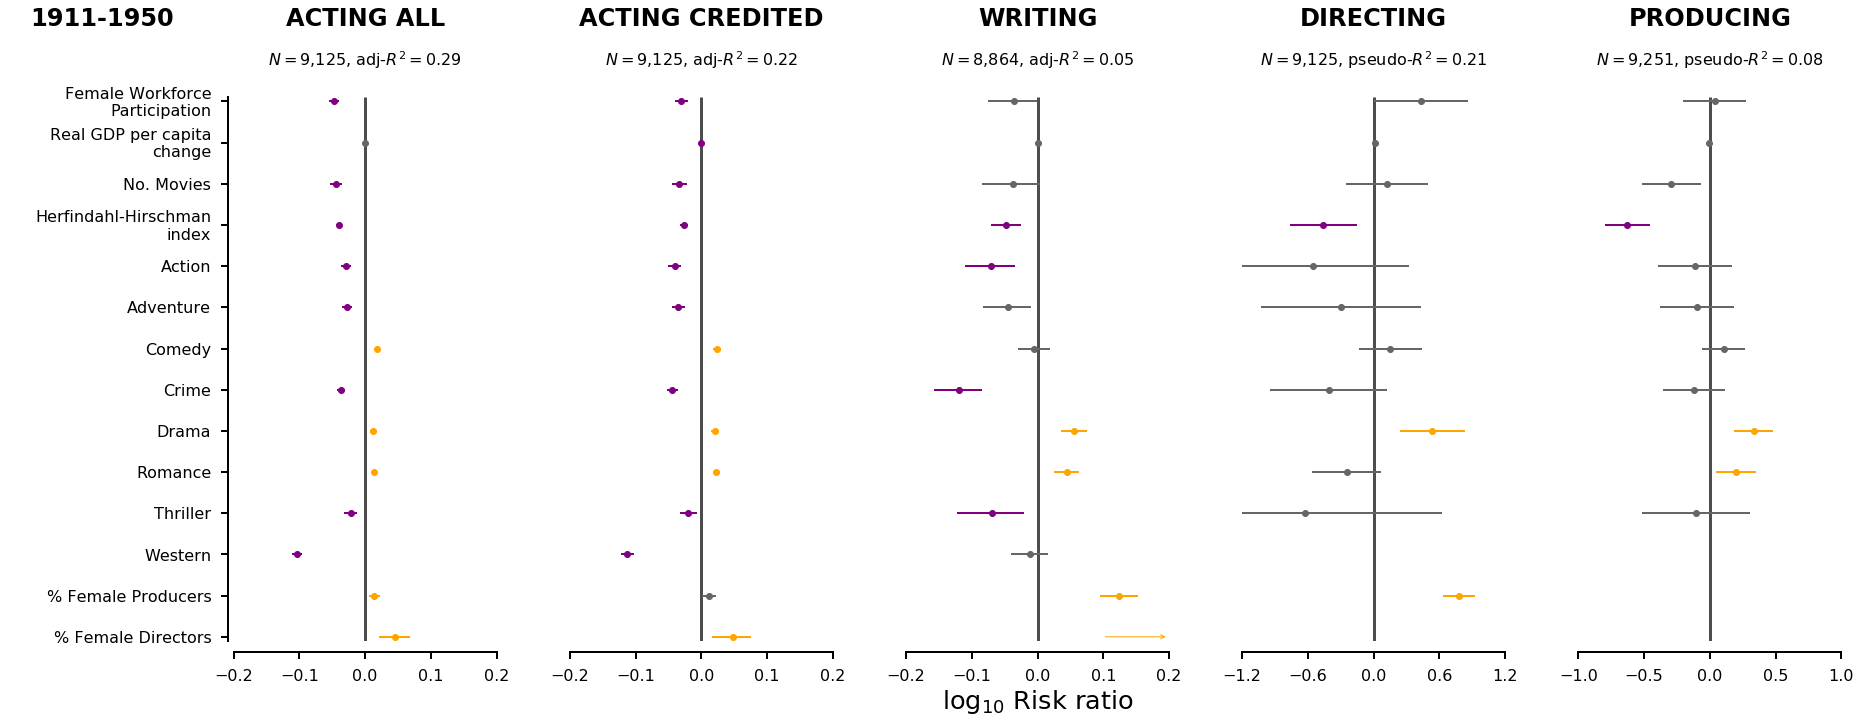

In [30]:
time_dummies_flag = False
# Option 1
#
y_min = 1911
y_max = 1950
director_flag = True
N_variables = N_inputs

# Option 2
#
# y_min = 1951
# y_max = 2010
# director_flag = True
# N_variables = N_inputs

time_dummies_formula = ''
variable_list = deepcopy(base_input)

t_period = f'{y_min}-{y_max}'
reduced = expanded_df[(expanded_df.year >= y_min) & (expanded_df.year <= y_max)]
print(f"Number of movies in choosen period is {len(reduced)}")

# Set up movie functions and their x-axis limits 

# Option 1
#
movie_roles = ['acting_all', 'acting_credited', 'writing', 'directing', 'producing']
# movie_roles = ['acting_all', 'acting_credited', 'writing', 'directing']
# movie_roles = ['acting_all', 'acting_credited', 'writing']
x_lim = {'acting_all': 0.2, 'acting_credited': 0.2, 'writing': 0.2, 'directing': 1.2,
         'cinematography': 1.0, 'producing': 1.0} 

# Option 2
#
# movie_roles = ['acting_all', 'acting_credited', 'writing', 'directing', 'cinematography']
# x_lim = {'acting_all': 0.2, 'acting_credited': 0.2, 'writing': 1.2, 'directing': 1.2,
#          'cinematography': 1.0, 'producing': 1.0}

# Setup canvas for plotting data
#
w_fig = 2
w_space = 0.1
my_font_size = 16
figure = plt.figure(figsize=(30.0, 10.))

gs1 = gridspec.GridSpec(1, 11, width_ratios=[w_space, w_fig, w_fig, w_space, 
                                             w_fig, w_space, w_fig, w_space, 
                                             w_fig, w_space, w_fig])
gs1.update(left=0.05, right=0.95)

logistic_fits = ['directing', 'cinematography', 'producing']
plot_dummies_flag = False
plot_risk_ratios( y_min, y_max, reduced, movie_roles, logistic_fits, time_dummies_flag, director_flag,
                  base_formula, formula_genre, time_dummies_formula, plot_dummies_flag, N_variables,
                  variable_list, figure, gs1, my_font_size, x_lim, e_value_delta  )
            
filename = f'figure_3_{y_min}-{y_max}'
print(f'\n{filename}')
save_fig(figure, filename, 'eps')


## Gender balance for four movie-making functions produced by the “Big Seven” — we drop Disney from the ”Big Eight” because during this period they focused on animation movies — and by the so-called Independents. 

We compare female representation for all movies and for movies produced by each group of studios. Values for all movies use the same colors as in Fig. 1. Values for movies produced by the “Big Seven” are shown in light yellow, and produced by the Independents in pink. Strikingly, during the first half of the 1920s, the
“Big Seven” released movies with lower representation levels of females in both acting and producing.


In [31]:
y_min = 1911
y_max = 2010

# Load data
#
json_dir = path.abspath( path.join(getcwd(), 'Json_files') )
with open(path.join(json_dir, 'movies_final.json'), 'r') as js_file:
    data_json = json.load(js_file)

# Create datasets for Major Studios and Independents
#
reduced_data_majors = []
reduced_data_independents = []
for item in data_json:
    condition1 = ('production_companies_list' in item.keys() and 
                  type(item['production_companies_list']) == list and 
                  ('20th Century' in item['production_companies_list'][0] or
                   'Columbia' in item['production_companies_list'][0] or 
                   'Fox' in item['production_companies_list'][0] or 
                   'Metro' in item['production_companies_list'][0] or 
                   'RKO' in item['production_companies_list'][0] or 
                   'Universal' in item['production_companies_list'][0] or 
                   'Warner' in item['production_companies_list'][0]))
    if condition1:
        reduced_data_majors.append( item )
    else:
        reduced_data_independents.append( item )

print(f'There are {len(data_json)} movies in total.\n'
      f'{len(reduced_data_majors)} are from Major Studio, '
      f'{len(reduced_data_independents)} are from independents.')


There are 26082 movies in total.
6735 are from Major Studio, 19347 are from independents.



ACTING_CREDITED
Early max of mean female percentage of 37.6 was achieved in 1918
Early maximum reached again in 1940
Mean female percentage was lowest in 1952 at a level of 24.5
Mean female percentage in 1966 was 34.5
Top female rate was: 39.94



DIRECTING
Early max of mean female percentage of 2.8 was achieved in 1918
Early maximum reached again in 1978
Mean female percentage was lowest in 1939 at a level of 0.1
Mean female percentage in 1966 was 1.7
Top female rate was: 12.14



PRODUCING
Early max of mean female percentage of 9.3 was achieved in 1922
Early maximum reached again in 1984
Mean female percentage was lowest in 1943 at a level of 0.7
Mean female percentage in 1966 was 3.1
Top female rate was: 24.41


Done with panel 



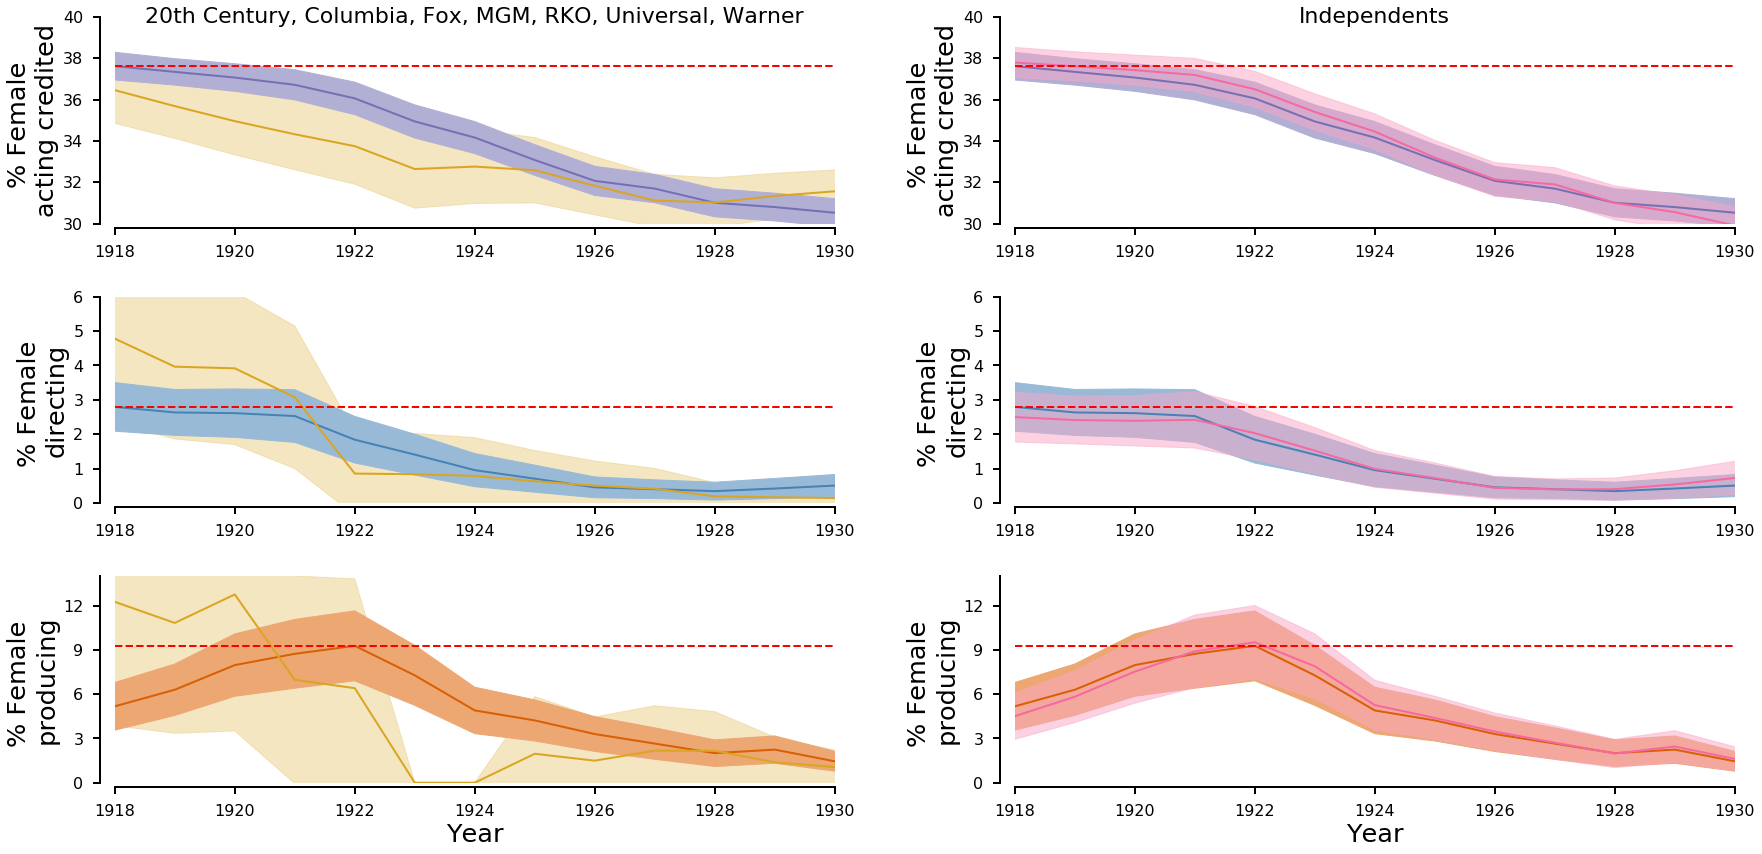

In [33]:
w_fig = 7.0
w_space = 0.9
my_font_size = 16

figure = plt.figure(figsize=(25., 15.))
gs1 = gridspec.GridSpec(6, 1, height_ratios=[w_space, w_fig, w_space, w_fig, 
                                             w_space, w_fig])
gs1.update(left=0.05, right=0.45)
gs2 = gridspec.GridSpec(6, 1, height_ratios=[w_space, w_fig, w_space, w_fig, 
                                             w_space, w_fig])
gs2.update(left=0.55, right=0.95)

roles = ['acting_credited', 'directing', 'producing']
color_ids = [1, 3, 4]
top_rates = [40, 6, 14]
bottom_rates = [30, 0, 0]
other_colors = ['goldenrod', '#f768a1']
other_bands = [sns.light_palette(other_colors[0], 3)[1], 
               sns.light_palette(other_colors[1], 3)[1]]
axes1 = []
axes2 = []
for i in range(3):
    axes1.append(figure.add_subplot(gs1[1 + 2 * i]))
    axes2.append(figure.add_subplot(gs2[1 + 2 * i]))

    print('\n{}'.format(roles[i].upper()))
    role_key = roles[i] + "_gender_percentage"
    line_color = PALETTE[color_ids[i]]

    movies_df = pd.DataFrame(data_json)
    movies_df = movies_df.dropna(subset=[role_key])

    movies_df1 = pd.DataFrame(reduced_data_majors)
    movies_df1 = movies_df1.dropna(subset=[role_key])

    movies_df2 = pd.DataFrame(reduced_data_independents)
    movies_df2 = movies_df2.dropna(subset=[role_key])

    period = [d.year for d in pd.date_range(str(y_min - 10), str(y_max), freq="AS")]
    female_percentage_mean, female_percentage_sem = roll_mean_sem_movies(role_key, movies_df, period, 5)
    female_percentage_mean1, female_percentage_sem1 = roll_mean_sem_movies(role_key, movies_df1, period, 5)
    female_percentage_mean2, female_percentage_sem2 = roll_mean_sem_movies(role_key, movies_df2, period, 5)

    # Early industry mean percentage
    y_early = 1918
    y_actual = female_percentage_mean.loc[y_early:1950].idxmax()
    early_gender = female_percentage_mean.loc[y_actual]
    print("Early max of mean female percentage of {:.1f} was achieved in {}".format(early_gender, y_actual))

    # When the percent of females recovers back to the early mean
    # Between 1920 and 1930 the percentage of female actors jumps a lot so we
    # start looking after that period
    y_recover = (female_percentage_mean.loc[1940:] > early_gender).idxmax()
    print("Early maximum reached again in", y_recover)

    # Year of lowest female representation
    y_lowest = female_percentage_mean.loc[1930:].idxmin()
    f_lowest = female_percentage_mean.loc[y_lowest]
    print("Mean female percentage was lowest in {} at a level of {:.1f}".format(y_lowest, f_lowest))

    # Second wave feminism
    y_wave = 1966
    try:
        f_wave = female_percentage_mean.loc[y_wave]
        print("Mean female percentage in {} was {:.1f}".format(y_wave, f_wave))
    except KeyError:
        print('No data for {}'.format(y_wave))

    top_rate = max(female_percentage_mean.loc[y_min:y_max])
    print('Top female rate was: {:.2f}'.format(top_rate))

    # Relevant level lines
    axes1[-1].hlines(early_gender, y_early, y_max, color='r', 
                    linestyle="dashed", lw=2, zorder=25)
    axes2[-1].hlines(early_gender, y_early, y_max, color='r', 
                    linestyle="dashed", lw=2, zorder=25)
    if f_lowest > 5.:
        axes1[-1].hlines(f_lowest, y_early, y_lowest, color='r', 
                        linestyle="dashdot", lw=2, zorder=25)
        axes2[-1].hlines(f_lowest, y_early, y_lowest, color='r', 
                        linestyle="dashdot", lw=2, zorder=25)
    # axes.hlines(f_wave, y_wave, y_max , color = 'r', lw=2, zorder = 10)

    # Set maximum for graph and add label to bottom panels of figure
    y_label = ('% Female' + ' \n' + roles[i]).replace('_', ' ')
    if i == 2:
        half_frame(axes1[-1], 'Year', y_label, font_size=my_font_size)
        half_frame(axes2[-1], 'Year', y_label, font_size=my_font_size)
    else:
        half_frame(axes1[-1], '', y_label, font_size=my_font_size)
        half_frame(axes2[-1], '', y_label, font_size=my_font_size)

    # Add text to top panels of figure
    if i == 0:
        axes1[-1].annotate('20th Century, Columbia, Fox, MGM, RKO, Universal, Warner',
                          xy = (1924, 40),
                          size = 2.2 * sns.mpl.rcParams["font.size"],
                          rotation = 0, verticalalignment = 'center', 
                          horizontalalignment = 'center')
        axes2[-1].annotate('Independents',
                          xy = (1924, 40),
                          size = 2.2 * sns.mpl.rcParams["font.size"],
                          rotation = 0, verticalalignment = 'center', 
                          horizontalalignment = 'center')

    # Plot data
    band_color = sns.light_palette(line_color, 3)[1]

    female_percentage_mean.plot(ax=axes1[-1], color=line_color, zorder=20, lw=2)
    axes1[-1].fill_between(female_percentage_mean.index,
                      female_percentage_mean - 2. * female_percentage_sem,
                      female_percentage_mean + 2. * female_percentage_sem,
                      color=band_color, zorder=19
                      )
    female_percentage_mean.plot(ax=axes2[-1], color=line_color, zorder=20, lw=2)
    axes2[-1].fill_between(female_percentage_mean.index,
                      female_percentage_mean - 2. * female_percentage_sem,
                      female_percentage_mean + 2. * female_percentage_sem,
                      color=band_color, zorder=9
                      )

    female_percentage_mean1.plot(ax=axes1[-1], color=other_colors[0], zorder=20, lw=2)
    axes1[-1].fill_between(female_percentage_mean1.index,
                      female_percentage_mean1 - 2. * female_percentage_sem1,
                      female_percentage_mean1 + 2. * female_percentage_sem1,
                      color=other_bands[0], zorder=12, alpha = 0.5,
                      )

    female_percentage_mean2.plot(ax=axes2[-1], color=other_colors[1], zorder=20, lw=2)
    axes2[-1].fill_between(female_percentage_mean2.index,
                      female_percentage_mean2 - 2. * female_percentage_sem2,
                      female_percentage_mean2 + 2. * female_percentage_sem2,
                      color=other_bands[1], zorder=12, alpha = 0.5,
                      )

    axes1[-1].set_ylim(bottom_rates[i], top_rates[i])
    axes1[-1].set_yticks(arange(bottom_rates[i], int(top_rates[i] + 1), 
                               int((top_rates[i]-bottom_rates[i]) / 4)))
    axes2[-1].set_ylim(bottom_rates[i], top_rates[i])
    axes2[-1].set_yticks(arange(bottom_rates[i], int(top_rates[i] + 1), 
                               int((top_rates[i]-bottom_rates[i]) / 4)))

    axes1[-1].set_xlim(1918, 1930)
    axes1[-1].set_xticks(arange(1918, 1931, 2))
    axes2[-1].set_xlim(1918, 1930)
    axes2[-1].set_xticks(arange(1918, 1931, 2))
    print('\n')

print('Done with panel \n')

save_fig(figure, 'figure_4', 'eps')


## Entry of new producers and directors into the U.S. movie industry. 

**(a)** Number of new producers and new directors entering the industry annually. Except for the 1910s, the number of new producers has systematically exceeded the number of new director entering the industry. 

**(b)** Temporal evolution of producing team size, directing team size, and cast size. U.S.-produced movies have maintained the tradition of having a single director. In contrast, producing teams have grown steadily in size, from a mean size of one until the mid-1940s to a mean of eight. Interestingly, cast size has grown in a more discontinuous manner, with three step changes occurring around 1915, 1935, and 1975. 

**(c)** Time dependence of the average size of the team of producers for all male and mixed-gender teams. Color bands show 95% confidence intervals. It is visually apparent, that teams that include females are typically larger and have grown faster. 

**(d)** Fraction of new producers (directors) who had at least 4 years of prior acting experience at the time of their first producer (director) credit. For directors, that fraction remained approximately constant during the entire period. In contrast, for producers, there are three well-defined peaks centered at 1922, 1948, and 1959. The presence and location of these peaks does not differ if we change the requirement on the duration of the prior acting experience to 6 or 8 years, or if we require a minimum of 5 or 10 prior acting credits.



In [35]:
roles = ['directors', 'producers']
creds = ['directing', 'producing']
transparency = [0.4, 0.8]
# PALETTE[3] is used for director and PALETTE[4] is used for producers

# Load data
persons_df = load_dataset('career_restricted')
print('Loaded {} persons'.format(len(persons_df)))

movies_df = load_dataset('movies_final')
print('Loaded {} movies'.format(len(movies_df)))


Loaded 264726 persons
Loaded 26082 movies


Number of new directing credits  is 6736.
Panel a, directing
Number of new producing credits  is 22744.
Panel a, producing
Panel b, directing
Panel b, producing
Panel c, producing
Panel d, directing
Panel d, producing


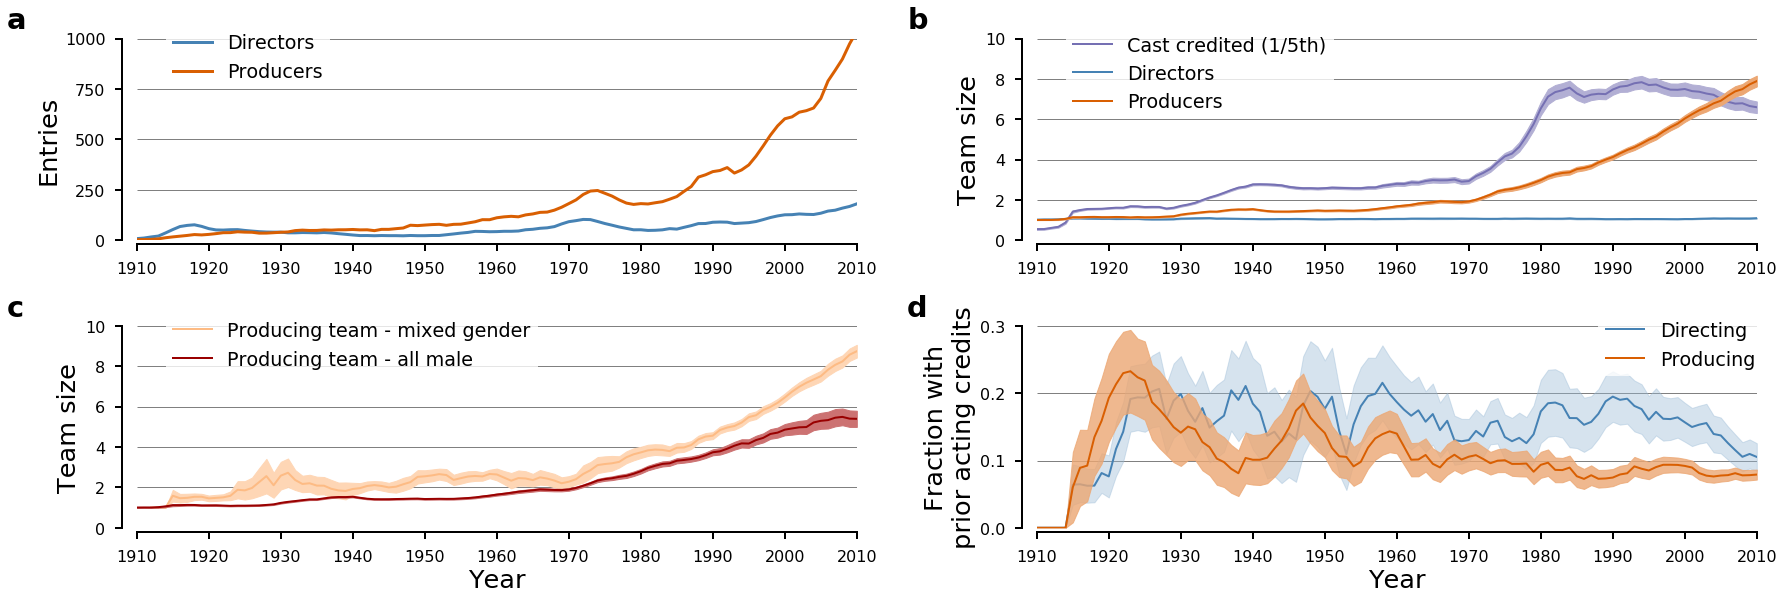

In [36]:
# Set limits for analysis
#
y_min = 1911
y_max = 2010
k = 0

# Create figure and appropriate relative sizes
#
figure = plt.figure(figsize=(25.0, 9.))

w_fig = 5.0
w_space = 0.7
my_font_size = 16

gs1 = gridspec.GridSpec(3, 1, height_ratios=[w_fig, w_space, w_fig])
gs1.update(left=0.05, right=0.45)

########################################################
# Producer/director entry rate
#
entries = figure.add_subplot(gs1[0])
half_frame(entries, '', 'Entries', font_size = my_font_size)
entries.hlines([250, 500, 750, 1000], 1910., 2010., color='grey', lw=1, zorder=0)
entries.text(-0.18, 1.05, ascii_lowercase[k], weight="bold",
                transform=entries.transAxes, size=1.8 * my_font_size)

transition_rate_mean = [[], []]
transition_rate_sem = [[], []]
for j, cred in enumerate(creds):
    data = []
    for i in range(len(persons_df)):
        item = dict(persons_df.iloc[i])
        first_year_acting = item['acting_all']['first']
        first_year_cred = item[cred]['first']

        if first_year_cred < 3010:
            count = 1
            if first_year_cred - first_year_acting > 4:
                delta = 1
            else:
                delta = 0
            data.append({'year': first_year_cred, cred: delta, 'count': count})

    print('Number of new {} credits  is {}.'.format(cred,len(data)))
    df = pd.DataFrame(data)

    # Transition rates which are plotted in panel d, below, need to be calculated here
    #
    date_range = [d.year for d in pd.date_range(str(y_min - 10), str(y_max), freq="AS")]
    entry_rate_mean = rolling_mean_sem('count', df, date_range, 5)
    # if j == 1:
    transition_rate_mean[j], transition_rate_sem[j] = roll_mean_sem_movies(cred, df, date_range, 5)

    entry_rate_mean.plot(ax = entries, label = roles[j].capitalize(), color = PALETTE[3+j], 
                         zorder = j, lw = 3)
    print('Panel {}, {}'.format(ascii_lowercase[k], creds[j]))

entries.set_xlim(1910, 2010)
entries.set_xticks(arange(1910, 2011, 10))
entries.set_ylim(0, 1000)
entries.set_yticks(arange(0, 1101, 250))
entries.legend(loc= (0.04, 0.75), 
               fontsize=1.2 * my_font_size).get_frame().set_linewidth(0.0)


########################################################
# Producers and Cast team sizes
#
k += 1
gs2 = gridspec.GridSpec(3, 1, height_ratios=[w_fig, w_space, w_fig])
gs2.update(left=0.55, right=0.95)

team_size = figure.add_subplot(gs2[0])
half_frame(team_size, '', 'Team size', font_size=my_font_size)
team_size.set_xlim(1910, 2010)
team_size.set_xticks(arange(1910, 2011, 10))
team_size.set_ylim(0, 10)
team_size.set_yticks(arange(0, 11, 2))
team_size.hlines([2, 4, 6, 8, 10], 1910., 2010., color='grey', lw=1, zorder=0)
team_size.text(-0.18, 1.05, ascii_lowercase[k], weight="bold",
               transform=team_size.transAxes, size=1.8 * my_font_size)

team_size_mean1, team_size_sem1 = roll_mean_sem_movies('cast_credited', movies_df, 
                                                       date_range, 5, True)
(team_size_mean1 / 5).plot(ax=team_size, label='Cast credited (1/5th)', 
                           color=PALETTE[1], zorder=1, lw=2)
team_size.fill_between(team_size_mean1.index,
                       (team_size_mean1 - 2. * team_size_sem1) / 5,
                       (team_size_mean1 + 2. * team_size_sem1) / 5,
                       color=sns.light_palette(PALETTE[1], 3)[1], zorder=0,
                       )

for j, cred in enumerate(creds):
    team_size_mean, team_size_sem = roll_mean_sem_movies(roles[j], movies_df, 
                                                         date_range, 5, True)
    team_size_mean.plot(ax=team_size, label=roles[j].capitalize(), 
                        color=PALETTE[3+j], zorder=2 * j + 3, lw=2)
    team_size.fill_between(team_size_mean.index,
                           team_size_mean - 2. * team_size_sem,
                           team_size_mean + 2. * team_size_sem,
                           color=sns.light_palette(PALETTE[3+j], 3)[1], zorder=2 * j + 2,
                           )
    print('Panel {}, {}'.format(ascii_lowercase[k], creds[j]))

team_size.legend(loc = (0.04, 0.6), 
                 fontsize=1.2 * my_font_size).get_frame().set_linewidth(0.0)


########################################################
# Producers team size
#
k += 1
team_size_gender = figure.add_subplot(gs1[2])
half_frame(team_size_gender, 'Year', 'Team size', font_size=my_font_size)
team_size_gender.set_xlim(1910, 2010)
team_size_gender.set_xticks(arange(1910, 2011, 10))
team_size_gender.set_ylim(0, 10)
team_size_gender.set_yticks(arange(0, 11, 2))
team_size_gender.hlines([2, 4, 6, 8, 10], 1910., 2010., color='grey', lw=1, zorder=0)
team_size_gender.text(-0.18, 1.05, ascii_lowercase[k], weight="bold",
                      transform=team_size_gender.transAxes, size=1.8 * my_font_size)
###########################
# Mixed gender teams
#
color_mixed_teams = '#fdbb84'
temp_list = []
cred_key = creds[1] + '_gender_percentage'
for i in range(len(movies_df)):
    temp_list.append(1 if movies_df.iloc[i][cred_key] > 0 else nan)

movies_df = movies_df.assign( mixed_produced = array(temp_list) )
movies_df3 = movies_df.dropna(subset = ['mixed_produced'])

team_size_mean, team_size_sem = roll_mean_sem_movies(roles[1], movies_df3, 
                                                     date_range, 5, True)
team_size_mean.plot(ax = team_size_gender, 
                    label = 'Producing team - mixed gender', color = color_mixed_teams,
                    zorder = 1, lw = 2)
team_size_gender.fill_between(team_size_mean.index,
                              team_size_mean - 2. * team_size_sem,
                              team_size_mean + 2. * team_size_sem,
                              color=sns.light_palette(color_mixed_teams, 3)[1],  
                              zorder = 0,
                             )

#######################
# Entirely male teams
#
color_male_teams = '#990000'
temp_list = []
cred_key = creds[1] + '_gender_percentage'
for i in range(len(movies_df)):
    temp_list.append(1 if movies_df.iloc[i][cred_key] == 0 else nan)

movies_df = movies_df.assign( male_produced = array(temp_list) )
movies_df2 = movies_df.dropna(subset = ['male_produced'])

team_size_mean, team_size_sem = roll_mean_sem_movies(roles[1], movies_df2, 
                                                     date_range, 5, True)
team_size_mean.plot(ax = team_size_gender, 
                    label = 'Producing team - all male', color = color_male_teams,
                    zorder = 3, lw = 2)
team_size_gender.fill_between(team_size_mean.index, 
                              team_size_mean - 2. * team_size_sem, 
                              team_size_mean + 2. * team_size_sem,
                              color=sns.light_palette(color_male_teams, 3)[1],  
                              zorder = 2,
                             )

team_size_gender.legend(loc = (0.04, 0.75), 
                        fontsize = 1.2 * my_font_size).get_frame().set_linewidth(0.0)
print('Panel {}, {}'.format(ascii_lowercase[k], creds[1]))

#########################################################
# Transition rate to producing from acting
#
k += 1
transition = figure.add_subplot(gs2[2])
half_frame(transition, 'Year', 'Fraction with\nprior acting credits', 
           font_size = my_font_size)
transition.set_xlim(1910, 2010)
transition.set_xticks(arange(1910, 2011, 10))
transition.set_ylim(0, 0.30)
transition.set_yticks(arange(0, 0.31, 0.1))
transition.hlines([0.1, 0.2, 0.3], 1910., 2010., color='grey', lw=1, zorder=0)
transition.text(-0.18, 1.05, ascii_lowercase[k], weight="bold",
                transform = transition.transAxes, size = 1.8*my_font_size)

for j, cred in enumerate(creds):
    transition_rate_mean[j].plot( ax = transition, label = creds[j].capitalize(),
                                  color = PALETTE[3+j], zorder = 2*j+3, lw = 2 )
    transition.fill_between( transition_rate_mean[j].index,
                             transition_rate_mean[j] - 2. * transition_rate_sem[j],
                             transition_rate_mean[j] + 2. * transition_rate_sem[j],
                             color = sns.light_palette(PALETTE[3+j], 3)[1], 
                             zorder = 2*j+3,
                             alpha = transparency[j]
                            )
    print('Panel {}, {}'.format(ascii_lowercase[k], creds[j]))

transition.legend(loc = (0.78, 0.75), 
                  fontsize = 1.2 * my_font_size).get_frame().set_linewidth(0.0)

save_fig(figure, 'figure_5', 'eps')

## Supplementary Information


### U.S. produced movies considered in our study by genre.



Got all Action movies
Number of movies in IMDb database is 2807
Done with panel for Action


Got all Adventure movies
Number of movies in IMDb database is 2415
Done with panel for Adventure


Got all Biography movies
Number of movies in IMDb database is 631
Done with panel for Biography


Got all Comedy movies
Number of movies in IMDb database is 7629
Done with panel for Comedy


Got all Crime movies
Number of movies in IMDb database is 3550
Done with panel for Crime


Got all Drama movies
Number of movies in IMDb database is 12889
Done with panel for Drama


Got all Documentary movies
Number of movies in IMDb database is 1097
Done with panel for Documentary


Got all Family movies
Number of movies in IMDb database is 750
Done with panel for Family


Got all Fantasy movies
Number of movies in IMDb database is 666
Done with panel for Fantasy


Got all Film-Noir movies
Number of movies in IMDb database is 672
Done with panel for Film-Noir


Got all History movies
Number of movies in IM

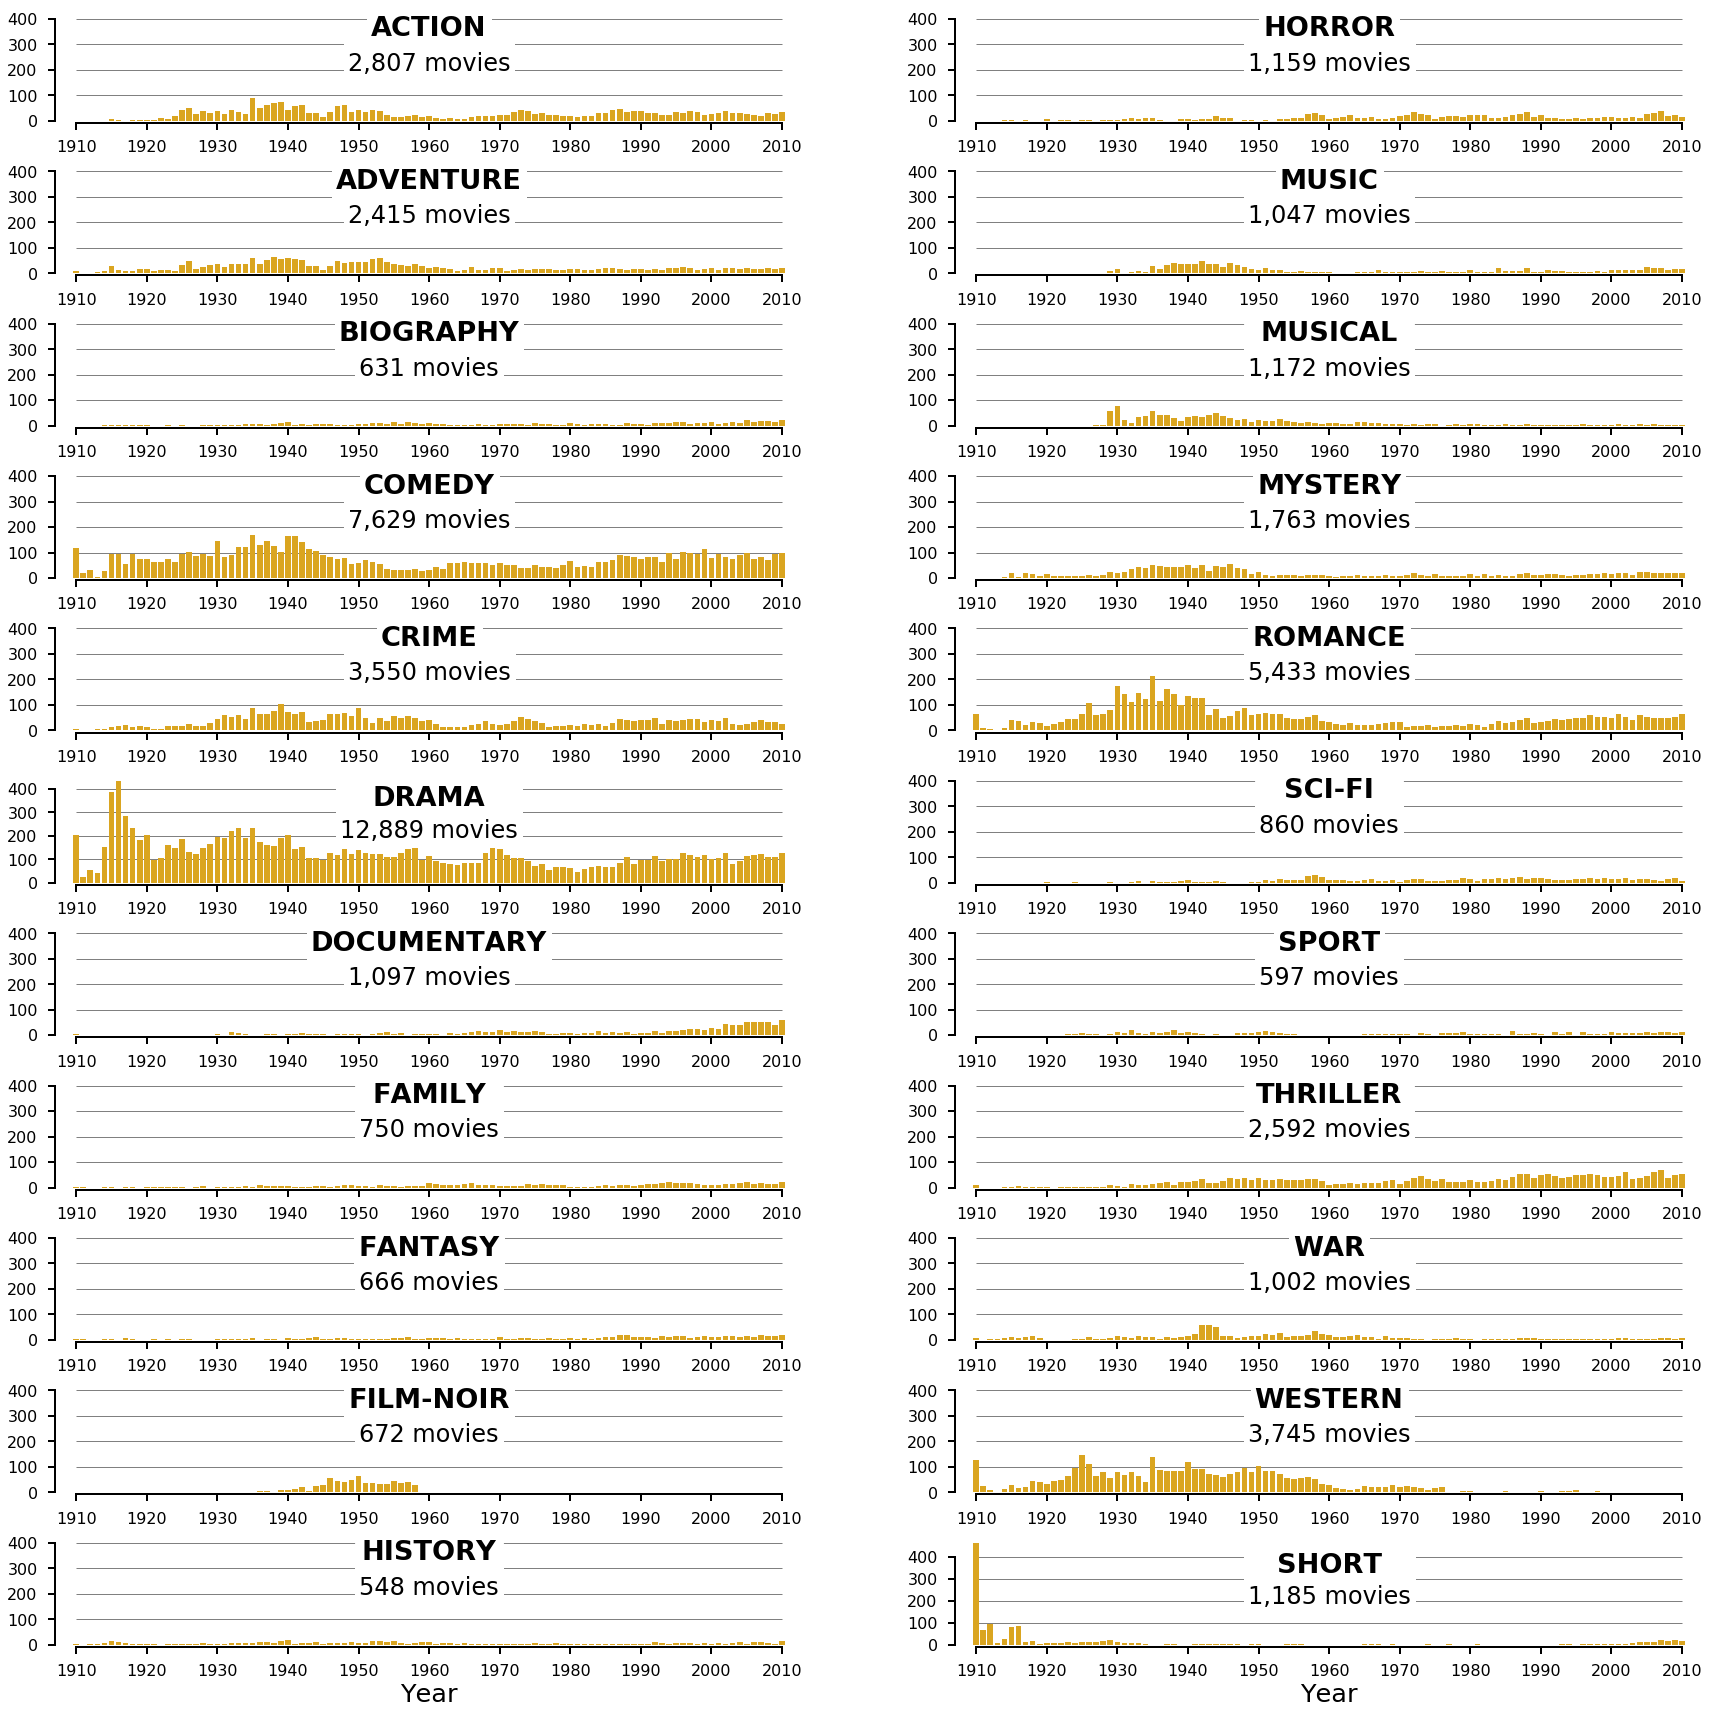

In [25]:
N = len(GENRES)
w_fig = 5.0
w_space = 0.9
my_font_size = 16
y_min = 1910
y_max = 2010
sub = []

figure = plt.figure(figsize=(25.0, 30.))
gs1 = gridspec.GridSpec(21, 1, height_ratios=[w_fig, w_space, w_fig, w_space, w_fig, w_space, w_fig,
                                              w_space, w_fig, w_space, w_fig, w_space, w_fig, w_space,
                                              w_fig, w_space, w_fig, w_space, w_fig, w_space, w_fig])
gs1.update(left=0.05, right=0.45)
gs2 = gridspec.GridSpec(21, 1, height_ratios=[w_fig, w_space, w_fig, w_space, w_fig, w_space, w_fig,
                                              w_space, w_fig, w_space, w_fig, w_space, w_fig, w_space,
                                              w_fig, w_space, w_fig, w_space, w_fig, w_space, w_fig])
gs2.update(left=0.55, right=0.95)


role = 'acting_all'
role_key = role + "_gender_percentage"

for i in range(int(N / 2)):
    if i == N / 2 - 1:
        ax_labels = ('Year', '')
    else:
        ax_labels = ('', '')

    movies = get_genre_movies_df(GENRES[i], role_key)
    print('\n\nGot all {} movies'.format(GENRES[i]))
    sub.append(figure.add_subplot(gs1[2*i]))
    plot_total_year_movies(sub[-1], movies, y_min, y_max, 400, my_font_size, GENRES[i], ax_labels, PALETTE)
    print('Done with panel for', GENRES[i])

for i in range(int(N / 2), N):
    if i == N - 1:
        ax_labels = ('Year', '')
    else:
        ax_labels = ('', '')

    movies = get_genre_movies_df(GENRES[i], role_key)
    print('\n\nGot all {} movies'.format(GENRES[i]))
    sub.append(figure.add_subplot(gs2[2*(i - int(len(GENRES) / 2))]))
    plot_total_year_movies(sub[-1], movies, y_min, y_max, 400, my_font_size, GENRES[i], ax_labels, PALETTE)
    print('Done with panel for', GENRES[i])

save_fig(figure, 'si_figure_1')


### Robustness checking of regression results

You can change the values of `PERIOD`, flags for inclusion of `budget`, `time dummies`, and `industry concentration`. Then, run the following three cells.


In [ ]:
# Robustness checking
#
time_dummies_flag = True
budget_flag = False
# budget_flag = True
concentration_flag = True
# concentration_flag = False
concentration_key = 'herf'
# PERIOD = 1
PERIOD = 4

TIME_DUMMIES = create_time_dummies(PERIOD)
    
# Set up inputs related to genre
#
included_genres = sorted( ['Action', 'Adventure', 'Comedy', 'Crime', 
                           'Romance', 'Drama', 'Thriller', 'Western'] )
formula_genre = ''
for g in included_genres:
    formula_genre += ' + ' + g.replace('-', '')

# Put together list of variables for studied models
#
base_input = create_base_input(concentration_key, concentration_flag, budget_flag, included_genres)
N_inputs = len(base_input)

print( f"\n-----------------------------------------------------------\n"
       f"The model considers {N_inputs} other variables:\n\t{base_input}" )


# Put together formula for studied models
#
base_formula = create_basic_formula(concentration_flag, budget_flag)
print( f"\n-----------------------------------------------------------\n"
       f"The initial formula (prior to adding genre and time dummies) is:"
       f"\n\t{base_formula}" )

In [ ]:
# Get dataframe for analysis
#
#      If you change the value of PERIOD, you must re-run this cell
#
movies_df = get_movies_df('producing_gender_percentage')
print(f'Got all {len(movies_df)} movies\n')

expanded_df = prepare_dataframe( movies_df, concentration_key, CONCENTRATION, 
                                 GENRES, TIME_DUMMIES, PERIOD )

print(f'\nAll done')


In [ ]:
y_min = 1919
y_max = 1958
logistic_fits = ['directing', 'cinematography', 'producing']
plot_dummies_flag = True
# director_flag = False
director_flag = True

time_dummies_formula = ''
if time_dummies_flag:
    i_i = 1 + int( (y_min - 1911) / PERIOD )
    i_f = 1 + int( (y_max - 1911) / PERIOD )
    variable_list = base_input + TIME_DUMMIES[i_i: i_f]
    N_variables = len(variable_list)
    
    for x in TIME_DUMMIES[i_i: i_f]:
        time_dummies_formula += f' + {x}'
else:
    i_i = 1
    i_f = 1
    variable_list = deepcopy(base_input)

t_period = f'{y_min}-{y_max}'
reduced = expanded_df[(expanded_df.year >= y_min) & (expanded_df.year <= y_max)]
print(f"Number of movies in choosen period is {len(reduced)}")

# Set up movie functions and their x-axis limits 
#
movie_roles = ['acting_all', 'acting_credited', 'writing', 'directing', 'producing']
# movie_roles = ['acting_all', 'acting_credited', 'writing', 'directing', 'cinematography']
# movie_roles = ['acting_all', 'acting_credited', 'writing', 'directing']
# movie_roles = ['acting_all', 'acting_credited', 'writing']

# x_lim = {'acting_all': 0.4, 'acting_credited': 0.4, 'writing': 1.2, 'directing': 1.0,
#          'cinematography': 1.0, 'producing': 0.2} 
# x_lim = {'acting_all': 0.2, 'acting_credited': 0.2, 'writing': 0.6, 'directing': 1.2,
#          'cinematography': 1.0, 'producing': 1.0} 
x_lim = {'acting_all': 0.2, 'acting_credited': 0.2, 'writing': 1.2, 'directing': 1.2,
         'cinematography': 1.0, 'producing': 1.0} 

# Setup canvas for plotting data
#
w_fig = 2
w_space = 0.1
my_font_size = 16
figure = plt.figure(figsize=(30.0, 8. + (i_f - i_i)))

gs1 = gridspec.GridSpec(1, 11, width_ratios=[w_space, w_fig, w_fig, w_space, 
                                             w_fig, w_space, w_fig, w_space, 
                                             w_fig, w_space, w_fig])
gs1.update(left=0.05, right=0.95)

plot_risk_ratios( y_min, y_max, reduced, movie_roles, logistic_fits, time_dummies_flag, director_flag,
                  base_formula, formula_genre, time_dummies_formula, plot_dummies_flag, N_variables,
                  variable_list, figure, gs1, my_font_size, x_lim, e_value_delta  )

filename = (f'figure_SI_period{t_period}_budget{budget_flag}'
            f'_tDummies{PERIOD}{time_dummies_flag}_conc{concentration_flag}')
print(f'\n{filename}')
save_fig(figure, filename)
